# Set Up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Thao tác cơ bản trong Pandas

# MÔ HÌNH
# Tiền xử lý dữ liệu
  # Làm sạch
  # Chuẩn hoá dữ liệu
  # Mã hoá dữ liệu định tính
  # Rời rạc hoá dữ liệu định lương
# EDA (Exploratory Data Analysis): phân tích dữ liệu
  # df.describe(): tổng quát thống kê
  # Xem từng biến
    # Trực quan hoá:
      # Phân bổ dữ liệu định lượng: histogram
      # Phân bổ dữ liệu định tính: countplot
      # Khoảng phân vị của dữ liệu: boxplot
  # Xem mối quan hệ giữa các biến
    # Có tương quan không:
      # cái này tăng cái kia tăng theo, giảm thì giảm theo -> tương quan thuận chiều
      # cái này tăng cái kia giảm, hoặc ngược lại -> tương quan ngược chiều
      # Scatter plot, line plot
      # scatter + line plot = lmplot
  # Xem phân bổ của từng biến và tương quan của từng cặp biến: pairplot
  # THỐNG KÊ MÔ TẢ: MÔ TẢ TRONG MẪU -> descriptive question: tình hình sao rồi?
# PREDICTIVE -> DỰ ĐOÁN TƯƠNG LAI
  # 1 MÔ HÌNH DỰ ĐOÁN: LINEAR REGRESSION -> hồi quy tuyến tính
    # KHI MUỐN DỰ ĐOÁN GIÁ TRỊ LIÊN TỤC (CONTINUOUS): giá nhà, doanh thu, lợi nhuân
  # PHÂN LOẠI: CÓ/KHÔNG
# PRESCRIPTIVE -> ĐƯA RA ĐỀ XUẤT: DỰA VÀO MÔ TẢ TRONG MẪU, CÓ THỂ ĐƯA KẾT LUẬN TỔNG QUÁT HƠN CHO DÂN SỐ HAY KHÔNG
  # DỰA VÀO MÔ TẢ + DỰ ĐOÁN -> ĐƯA RA HÀNH ĐỘNG/GIẢI PHÁP NÀO ĐÓ CHO DOANH NGHIỆP
  # Dựa vào mô tả của mẫu, có thể đưa ra kết luận tổng quát cho dân số hay không
  # Dựa vào kết quả của mô hình dự đoán, có thể tự tin rằng mô hình đó vẫn đúng khi thực sự áp dụng bên ngoài hay không
  # INFERENTIAL STATISTICS: thống kê suy luận - kiểm định giả thiết và kiểm định tương quan

In [ ]:
df = pd.read_csv('advertising.csv')

# Xem dữ liệu

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# TV: chi phí quảng cáo qua truyền hình (đơn vị nghìn USD)
# Radio: chi phí quảng cáo qua radio (đơn vị nghìn USD)
# Newspaper: chi phí quảng cáo qua báo chí (đơn vị nghìn USD)
# Sales: số sản phẩm bán được (đơn vị nghìn)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Phân tích dữ liệu

## Từng biến lẻ

<Axes: >

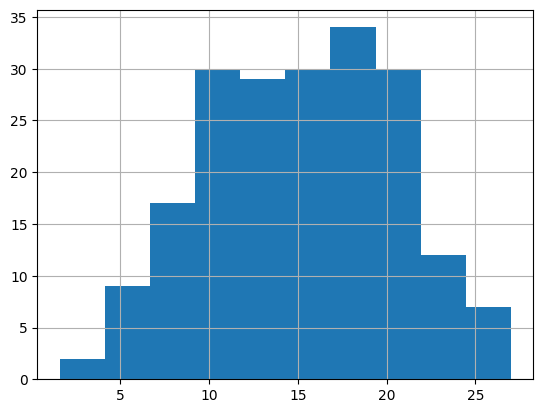

In [ ]:
# Biến kết quả
# Dự đoán Sales
# phân bổ của Sales
df['Sales'].hist()

<Axes: >

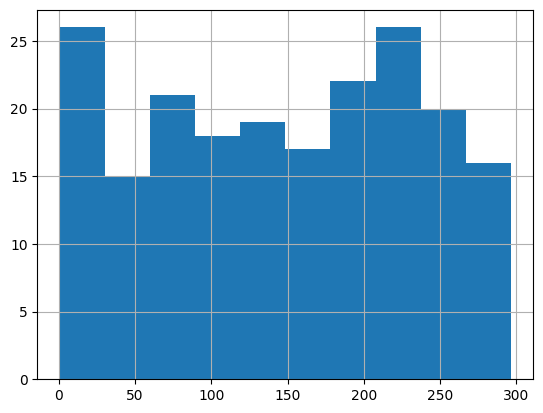

In [ ]:
df['TV'].hist()

<Axes: >

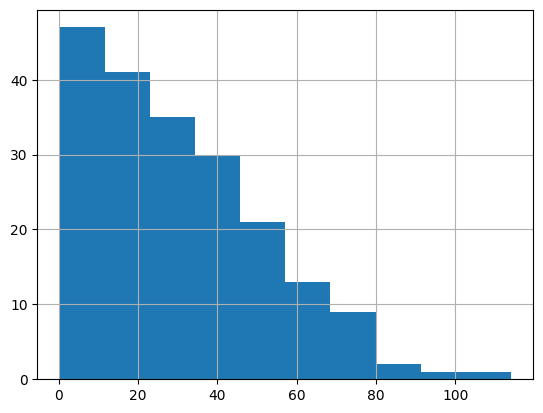

In [ ]:
df['Newspaper'].hist()

<Axes: >

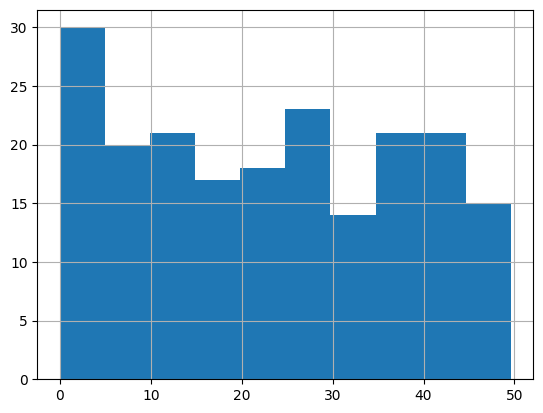

In [ ]:
df['Radio'].hist()

## Mối quan hệ giữa các biến

### Mối quan hệ giữa biến dự đoán và biến kết quả

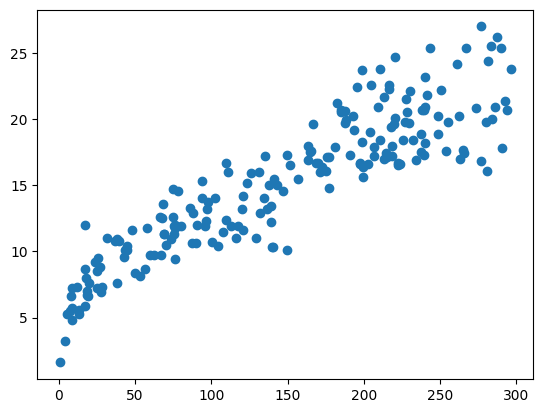

In [ ]:
# TV và Sales
plt.scatter(x=df['TV'],y=df['Sales'])
# tỷ lệ thuận: chi càng nhiều tiền cho quảng cáo trên TV thì sales càng cao

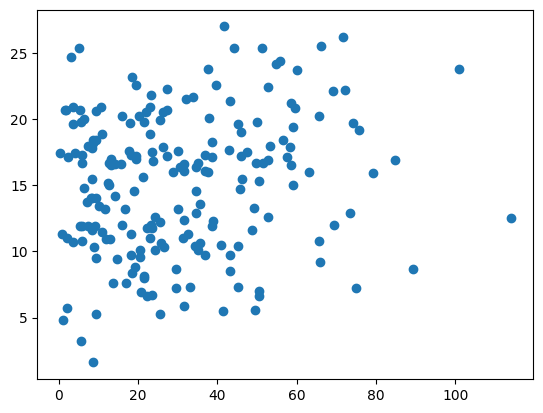

In [ ]:
# Newspaper và Sales
plt.scatter(x=df['Newspaper'],y=df['Sales'])
# Có vẻ tiêu tiền vào quảng cáo trên Báo không có tương quan với doanh thu

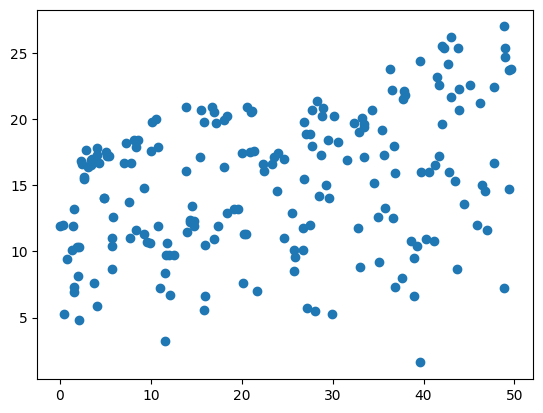

In [ ]:
# Radio và Sales
plt.scatter(x=df['Radio'],y=df['Sales'])


### Mối quan hệ giữa 3 biến độc lập/biến dự đoán

In [ ]:
df[['TV', 'Newspaper', 'Radio']].corr()

,TV,Newspaper,Radio
TV,1.000000,0.056648,0.054809
Newspaper,0.056648,1.000000,0.354104
Radio,0.054809,0.354104,1.000000


# Làm mô hình dự đoán: Hồi quy tuyến tính

In [ ]:
# Làm mô hình

# Bắt đầu với một hình đơn giản nhất có thể

# Simple Linear Regression

# Bắt đầu với 1 biến dự đoán: TV

In [ ]:
# Sales = TV*a + b
# Tìm a, b sao cho kết quả dự đoán gần với kết quả thực nhất

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# phân tích và xử lý dữ liệu: pandas, numpy
# trực quan hoa dữ liệu: matplotlib, seaborn
# làm mô hình dự đoán: scikit-learn -> sklearn

## Chỉ định biến

In [ ]:
# Đâu là biến dự đoán (độc lập), đâu là biến kết quả (phụ thuộc)
X = df[['TV']]
y = df['Sales']

## Tách dữ liệu

In [ ]:
# Mô hình của mình có tốt không?
# Dựa vào đâu để đánh giá sự tốt/xấu của mô hình
  # Dựa vào chỉ số: Mean Absolute Error, Mean Square Error (tìm kết quả có sai số nhỏ nhất giữa cái dự đoán và cái thực tế)
  # Trên tập dữ liệu nào: Tăng sự yên tâm là ra ngoài mô hình vẫn tốt
    # Tách dữ liệu:
      # Phần 1: Tập huấn luyện (Training Data) -> xây mô hình trên tập huấn luyện (70-80%)
      # Phần 2: Tập kiểm tra (Validation/Testing Data) -> đánh giá kết quả mô hình (20-30%)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [ ]:
len(X_train)

160

In [ ]:
len(X_test)

40

## Xây mô hình

In [ ]:
# Gọi hàm Linear Regression
lr = LinearRegression()

In [ ]:
# Áp hàm này lên tập train
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Đọc hiểu kết quả mô hình
# In ra a và b
# a: weight/coefficient - trọng số
# b: bias/intercept - biến số

In [ ]:
coefficient = lr.coef_

In [ ]:
intercept = lr.intercept_

In [ ]:
coefficient

array([0.0556326])

In [ ]:
intercept

6.926176208909798

In [ ]:
# đọc hiểu mô hình

In [ ]:
# Sales = TV*coefficient + intercept
# Giả sử công ty tiêu 20 (nghìn đô) vào quảng cáo trên TV, thì doanh số dự đoán của công ty sẽ bằng bao nhiêu?
sales = 20*coefficient + intercept
sales

array([8.03882811])

In [ ]:
# đơn vị của sales: (nghìn hàng)
# nếu công ty tiêu 20 (nghìn đô) vào quảng cáo trên TV thì doanh số dự kiến sẽ là khoảng 8 (nghìn) sản phẩm

In [ ]:
# nhận xét dựa trên kết quả mô hình

## Đánh giá kết quả mô hình

In [ ]:
# Đánh giá kết quả ở đâu: Test
# Đưa ra kết quả dự đoán ở tập test
y_pred = lr.predict(X_test)
y_pred # kết quả Thuỷ Tiên dự đoán
# y_test: kết quả thật trên tập test
# So sánh y dự đoán (y_pred) với y thật (y_test)

array([19.19316345, 14.50333567, 17.6743936 , 13.91919342, 10.85383743,
       21.54085896, 12.25021557,  8.00544856,  7.40461653, 16.02210552,
       18.33085822, 14.78706191,  7.88305685, 10.73144572, 14.44770308,
        7.41017979, 21.77451586, 10.24187888, 13.0847045 , 12.27803187,
        9.04021483, 19.15422063, 22.7035802 , 14.67023346, 20.88439434,
       23.04293903, 11.83853436, 20.13335431, 12.74534567, 20.23905624,
       22.83709843, 14.67579672, 16.77314556,  7.972069  , 13.44631636,
       21.04572887, 18.90943721, 21.70219349, 20.13335431, 16.52279888])

In [ ]:
# Chỉ số: Mean Absolute Error, Mean Square Error, Root Mean Square Error
from sklearn import metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8287017503195773
Mean Squared Error: 4.686266464866949
Root Mean Squared Error: 2.16477861798082


In [ ]:
# Mean Absolute Error: trung bình doanh số dự đoán đang lệch khỏi doanh số thật 1800 sản phẩm
# Root Mean Squared Error: nếu đánh giá kết quả chặt chẽ hơn, thì trung bình doanh số dự đoán đang lệch khỏi doanh số thật 2164 sản phẩm

In [ ]:
# Mô hình tốt hay không tốt?
# Dự đoán sát thực tế không?
# 1800 có sát chưa?

In [ ]:
df['Sales'].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

In [ ]:
# chấp nhận được
# Dựa vào phạm vi và tính chất của biến mình muốn dự đoán

# Cải thiện kết quả mô hình

In [ ]:
# Tăng thêm biến

In [ ]:
# Dùng TV, Radio, Newspaper
X = df[['TV', 'Radio']]
y = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1023635346225338
Mean Squared Error: 2.0307575929339317
Root Mean Squared Error: 1.4250465230770297
